In [1]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

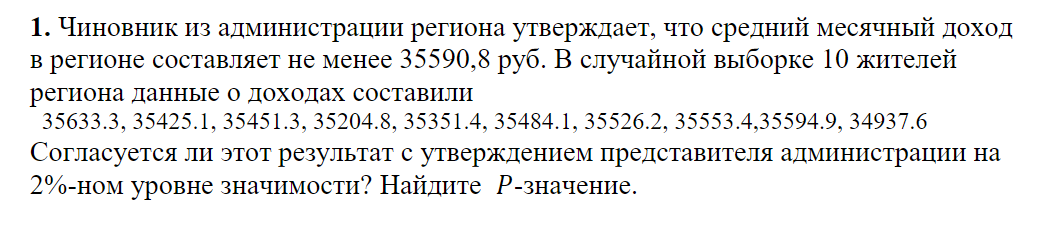

In [2]:
x = np.array('35633.3, 35425.1, 35451.3, 35204.8, 35351.4, 35484.1, 35526.2, 35553.4,35594.9, 34937.6'.split(',')).astype(float)
mu0 = 35590.8
alpha = 0.02
n = x.size
x_sr = x.mean()
s = x.std(ddof=1)
se = s/np.sqrt(n)
t_obs = (x_sr - mu0)/se
t_cr = t.ppf(1-alpha/2,n-1)

p_val = 2*(1 - t(n-1).cdf(abs(t_obs)))
display(Math(r"\text{P-значение для двустороннего теста: }"+ str(v_rrstr(p_val,4))))
# Проверка гипотезы
if alpha > p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~') + r'\mu < ' + str(mu0)))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.".replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

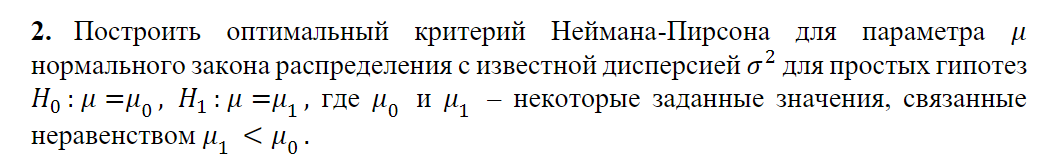

Критерий Неймана-Пирсона для нормального распределения с известной дисперсией $ \sigma^2 $ строится для проверки двух простых гипотез, которые даны по условию

$$
H_0: \mu = \mu_0 \quad \text{против} \quad H_1: \mu = \mu_1, \quad \mu_1 < \mu_0.
$$


---

#### Плотность нормального распределения:
Плотность нормального распределения с параметрами $\mu$ и $\sigma^2$ для выборки $x = (x_1, x_2, \ldots, x_n)$ равна:
$$
f(x \mid \mu) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).
$$

#### Отношение правдоподобия:
Отношение правдоподобия $ \Lambda $ для гипотез $H_0$ и $H_1$ равно:
$$
\Lambda = \frac{f(x \mid \mu_1)}{f(x \mid \mu_0)}.
$$

Подставим плотности:
$$
\Lambda = \exp\left(-\frac{\sum_{i=1}^n (x_i - \mu_1)^2}{2\sigma^2} + \frac{\sum_{i=1}^n (x_i - \mu_0)^2}{2\sigma^2}\right).\\~\\


\Lambda = \exp\left(-\frac{n}{2\sigma^2}\left[(\bar{x} - \mu_1)^2 - (\bar{x} - \mu_0)^2\right]\right),\\~\\

\text{где $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ — выборочное среднее.}\\~\\

\Lambda = \exp\left(-\frac{n}{2\sigma^2}\left[(\bar{x} - \mu_1)^2 - (\bar{x} - \mu_0)^2\right]\right)\\~\\

\Lambda = \exp\left(-\frac{n}{2\sigma^2}\left[((\bar{x} - \mu_1) - (\bar{x} - \mu_0))((\bar{x} - \mu_1) + (\bar{x} - \mu_0))\right]\right)\\~\\

\Lambda = \exp\left(-\frac{n}{2\sigma^2}\left[( \mu_0 -  \mu_1)(2\bar{x} - \mu_1  - \mu_0)\right]\right)\\~\\

\Lambda = \exp\left(\frac{\mu_1 -  \mu_0}{\sigma^2} n \left(\bar{x} - \frac{\mu_1  + \mu_0}{2}\right)\right)\\~\\

\Lambda > C_{\alpha}, 

\\~\text{где $C_{\alpha}$ - порог для $x$, зависящий от уровня значимости $\alpha$}\\

\Downarrow\\~\\

\frac{\mu_1 -  \mu_0}{\sigma^2} n \left(\bar{x} - \frac{\mu_1  + \mu_0}{2}\right) > ln(C_{\alpha})\\~\\

\text{Откуда выразим $\bar{x}$:}\\~\\

\bar{x} > \boxed{\frac{C_{\alpha} \sigma^2 }{\mu_1 -  \mu_0} + \frac{\mu_1  + \mu_0}{2}}\\~\\

\text{Возьмем обведенное за некое $c$ и найдем вероятность ошибки первого рода:}\\~\\

\alpha = \mathbb{P}(H_1|H_0) = \mathbb{P}(\bar{x} > x|\mu = \mu_0) = \\

= \mathbb{P}\left(\frac{\bar{x} - \mu_0}{\sigma /\sqrt{n}} > \frac{c - \mu_0}{\sigma /\sqrt{n}} \bigg|\mu = \mu_0 \right) = F_{\mathcal{N}(0,1)} \left( \frac{c - \mu_0}{\sigma /\sqrt{n}}\right)\\~\\

\Downarrow\\

\frac{c - \mu_0}{\sigma /\sqrt{n}} = z_{\alpha}\\~\\

\text{Ответ: $\boxed{c = \frac{\sigma}{\sqrt{n}} z_{\alpha} + \mu_0}$}
$$

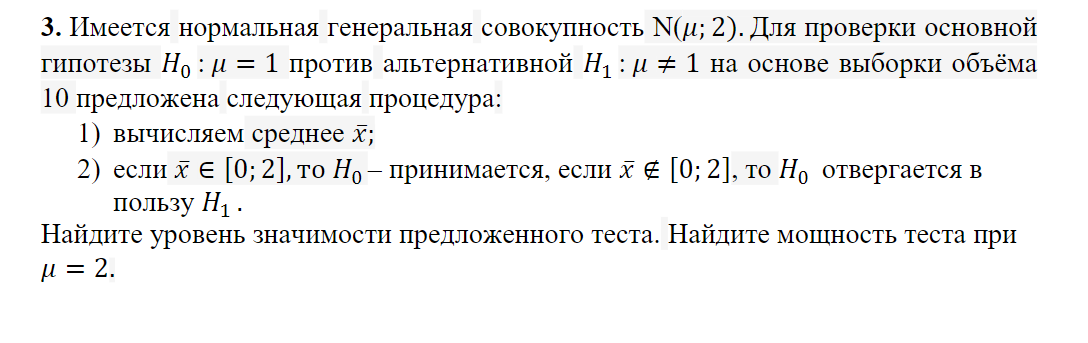

Рассмотрим нормальную генеральную совокупность $ N(\mu; 2) $ и выборку объема $ n = 10 $. Известно, что стандартное отклонение $ \sigma = \sqrt{2} $. Построим тест:

---



### 1. Уровень значимости теста ($ \alpha $):

Уровень значимости теста — это вероятность отклонения $ H_0 $ при условии, что $ H_0 $ истинна ($ \mu = 1 $).

Выборочное среднее $ \bar{x} $ распределено нормально с параметрами:
$$
\bar{x} \sim N\left(\mu, \frac{\sigma^2}{n}\right) = N\left(\mu, \frac{2}{10}\right) = N\left(\mu, 0.2\right).
$$
При $ H_0: \mu = 1 $, имеем:
$$
\bar{x} \sim N\left(1, 0.2\right).
$$

Гипотеза $ H_0 $ отвергается, если $ \bar{x} \notin [0, 2] $.

 Уровень значимости вычисляется как вероятность того, что $ \bar{x} $ попадает за пределы интервала $ [0, 2] $:
$$
\alpha = P(\bar{x} < 0) + P(\bar{x} > 2).
$$

Стандартизируем:
$$
P(\bar{x} < 0) = P\left(Z < \frac{0 - 1}{\sqrt{0.2}}\right) = P(Z < -2.236),
$$
$$
P(\bar{x} > 2) = P\left(Z > \frac{2 - 1}{\sqrt{0.2}}\right) = P(Z > 2.236).
$$
$$
P(Z < -2.236) = P(Z > 2.236)
$$

Суммарная вероятность:
$$
\alpha = 2 * P(Z > 2.236)
$$

In [3]:
alpha = 2 * norm.sf((1/0.2**0.5))
display(Math(r'\alpha = ' + str(rrstr(alpha,5))))

<IPython.core.display.Math object>

### 2. Мощность теста ($ 1 - \beta $) при $ \mu = 2 $:

Мощность теста — это вероятность отклонения $ H_0 $ при условии, что альтернативная гипотеза $ H_1 $ истинна ($ \mu = 2 $).

При $ \mu = 2 $, имеем:
$$
\bar{x} \sim N(2, 0.2).
$$

Гипотеза $ H_0 $ отвергается, если $ \bar{x} \notin [0, 2] $. Соответственно, вероятность отклонения:
$$
1 - \beta = P(\bar{x} < 0) + P(\bar{x} > 2).
$$

Рассчитаем эти вероятности:
$$
P(\bar{x} < 0) = P\left(Z < \frac{0 - 2}{\sqrt{0.2}}\right) = P(Z < -4.472),
$$
$$
P(\bar{x} > 2) = P\left(Z > \frac{2 - 2}{\sqrt{0.2}}\right) = P(Z > 0).
$$

In [4]:
beta = norm.cdf((-2/0.2**0.5)) + norm.sf((0/0.2**0.5))
display(Math(r'\beta = ' + str(rrstr(beta,1))))

<IPython.core.display.Math object>